<a href="https://colab.research.google.com/github/taegyunjjang/ml_study/blob/main/4_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
x = iris['data'][:, 3:]                 # 꽃잎의 너비 변수만 사용
y = (iris['target'] == 2).astype('int') # index=2 : virginica

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
log_reg.classes_

array([0, 1])

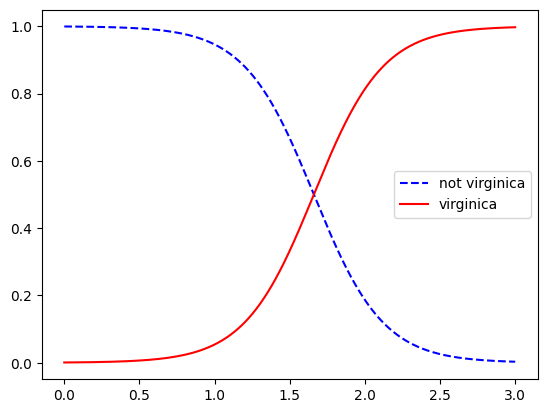

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)

plt.plot(x_new, y_proba[:, 0], 'b--', label='not virginica')
plt.plot(x_new, y_proba[:, 1], 'r-', label='virginica')

plt.legend()
plt.show()

In [ ]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [ ]:
x = iris['data'][:, (2, 3)] # 꽃잎의 길이, 너비 변수를 사용
y = iris['target']          # 3개 모든 클래스 사용

# C : L2 규제화
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=2021)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=2021)

In [ ]:
new_iris = [[5, 2]] # 꽃잎 길이=5, 너비=2

# predict와 predict_proba 차이는?
prediction = softmax_reg.predict(new_iris)[0]
label = iris['target_names'].tolist()
print(label[prediction])

virginica


In [ ]:
label

['setosa', 'versicolor', 'virginica']

In [ ]:
softmax_reg.predict(new_iris)[0]

2

In [ ]:
softmax_reg.predict_proba(new_iris) # index=2일 때 확률이 가장 큼

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:
# SVM
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris['data'][:, (2, 3)] # 꽃잎 길이와 너비
y = (iris['target'] == 2).astype('int')

# classifier
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

# 모델 훈련
svm_clf.fit(x, y)

# 예측
new_iris = [[5.5, 1.7]] # 길이=5.5cm, 너비=1.7
prediction = svm_clf.predict(new_iris)[0]
print(prediction) # 1:True -> virginica가 맞음

# label = iris['target_names'].tolist()
# print(label[prediction])

1


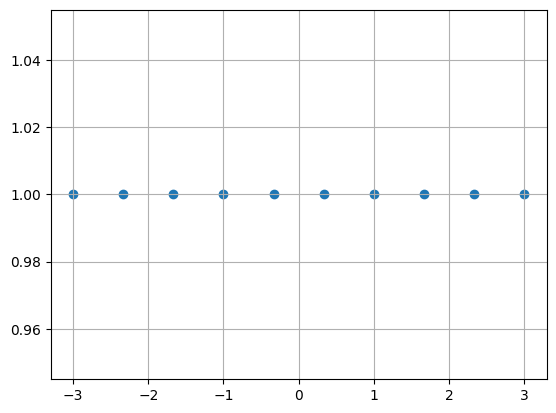

In [ ]:
# 비선형 SVM 분류

import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 10)
y = np.linspace(1, 1, 10)

plt.scatter(x, y)
plt.grid()
plt.show()

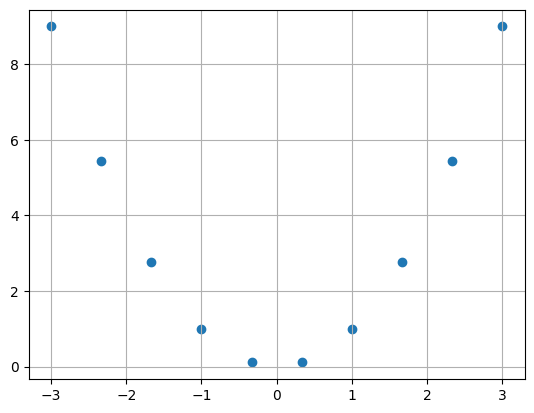

In [ ]:
b_func = x**2
plt.scatter(x, b_func)
plt.grid()
plt.show()

In [ ]:
# 비선형 SVM => 예제 : make_moons
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

# 샘플 수 1000개, noise=0.1, random_state=2021
x, y = make_moons(n_samples=1000, noise=0.1, random_state=2021)

# 변수 변환 : polynomial 3차 다항식, scaler:StandardScaler, 모델:linearSVC
polynomial_std_svm = Pipeline([
    ("polynomial", PolynomialFeatures(degree=3)),
    ('std', StandardScaler()),
    ('svm', LinearSVC(C=10, loss='hinge'))
])

# 모델 학습
polynomial_std_svm.fit(x, y)

# 예측
new_moon = [[2.0, 1.0]]
polynomial_std_svm.predict(new_moon)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([1])

In [ ]:
np.unique(y)  # make_moons는 두 개의 클래스로 분류할 수 있음

array([0, 1])

In [ ]:
from sklearn.svm import SVC
poly_kernel_std_svm = Pipeline([
    ('std', StandardScaler()),
    ('poly_kearnel_svm', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_std_svm.fit(x, y)

Pipeline(steps=[('std', StandardScaler()),
                ('poly_kearnel_svm', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
# SVM 가우시안 RBF 커널
rbf_kernel_std_svm = Pipeline([
    ('std', StandardScaler()),
    ('rbf_kernel_svm', SVC(kernel='rbf', gamma=3, C=0.001))
])

rbf_kernel_std_svm.fit(x, y)

Pipeline(steps=[('std', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=0.001, gamma=3))])